## 1. Data on tags over time
<p>How can we tell what programming languages and technologies are used by the most people? How about what languages are growing and which are shrinking, so that we can tell which are most worth investing time in?</p>
<p>One excellent source of data is <a href="https://stackoverflow.com/">Stack Overflow</a>, a programming question and answer site with more than 16 million questions on programming topics. By measuring the number of questions about each technology, we can get an approximate sense of how many people are using it. We're going to use open data from the <a href="https://data.stackexchange.com/">Stack Exchange Data Explorer</a> to examine the relative popularity of languages like R, Python, Java and Javascript have changed over time.</p>
<p>Each Stack Overflow question has a <strong>tag</strong>, which marks a question to describe its topic or technology. For instance, there's a tag for languages like <a href="https://stackoverflow.com/tags/r">R</a> or <a href="https://stackoverflow.com/tags/python">Python</a>, and for packages like <a href="https://stackoverflow.com/questions/tagged/ggplot2">ggplot2</a> or <a href="https://stackoverflow.com/questions/tagged/pandas">pandas</a>.</p>
<p><img src="https://assets.datacamp.com/production/project_435/img/tags.png" alt="Stack Overflow tags"></p>
<p>We'll be working with a dataset with one observation for each tag in each year. The dataset includes both the number of questions asked in that tag in that year, and the total number of questions asked in that year.</p>

In [88]:
# Load libraries
library(readr)
library(dplyr)

# Load dataset
by_tag_year <- read_csv('datasets/by_tag_year.csv')

# Inspect the dataset
print(by_tag_year)

Parsed with column specification:
cols(
  year = col_double(),
  tag = col_character(),
  number = col_double(),
  year_total = col_double()
)


# A tibble: 40,518 x 4
    year tag           number year_total
   <dbl> <chr>          <dbl>      <dbl>
 1  2008 .htaccess         54      58390
 2  2008 .net            5910      58390
 3  2008 .net-2.0         289      58390
 4  2008 .net-3.5         319      58390
 5  2008 .net-4.0           6      58390
 6  2008 .net-assembly      3      58390
 7  2008 .net-core          1      58390
 8  2008 2d                42      58390
 9  2008 32-bit            19      58390
10  2008 32bit-64bit        4      58390
# ... with 40,508 more rows


## 2. Now in fraction format
<p>This data has one observation for each pair of a tag and a year, showing the number of questions asked in that tag in that year and the total number of questions asked in that year. For instance, there were 54 questions asked about the <code>.htaccess</code> tag in 2008, out of a total of 58390 questions in that year.</p>
<p>Rather than just the counts, we're probably interested in a percentage: the fraction of questions that year that have that tag. So let's add that to the table.</p>

In [90]:
# Add fraction column
by_tag_year_fraction <- by_tag_year %>%
    mutate(fraction = number / year_total)

# Print the new table
print(by_tag_year_fraction)

# A tibble: 40,518 x 5
    year tag           number year_total  fraction
   <dbl> <chr>          <dbl>      <dbl>     <dbl>
 1  2008 .htaccess         54      58390 0.000925 
 2  2008 .net            5910      58390 0.101    
 3  2008 .net-2.0         289      58390 0.00495  
 4  2008 .net-3.5         319      58390 0.00546  
 5  2008 .net-4.0           6      58390 0.000103 
 6  2008 .net-assembly      3      58390 0.0000514
 7  2008 .net-core          1      58390 0.0000171
 8  2008 2d                42      58390 0.000719 
 9  2008 32-bit            19      58390 0.000325 
10  2008 32bit-64bit        4      58390 0.0000685
# ... with 40,508 more rows


## 3. Has R been growing or shrinking?
<p>So far we've been learning and using the R programming language. Wouldn't we like to be sure it's a good investment for the future? Has it been keeping pace with other languages, or have people been switching out of it?</p>
<p>Let's look at whether the fraction of Stack Overflow questions that are about R has been increasing or decreasing over time.</p>

In [92]:
# Filter for R tags
r_over_time <- by_tag_year_fraction %>%
    filter(tag == 'r')

# Print the new table
print(r_over_time)

# A tibble: 11 x 5
    year tag   number year_total fraction
   <dbl> <chr>  <dbl>      <dbl>    <dbl>
 1  2008 r          8      58390 0.000137
 2  2009 r        524     343868 0.00152 
 3  2010 r       2270     694391 0.00327 
 4  2011 r       5845    1200551 0.00487 
 5  2012 r      12221    1645404 0.00743 
 6  2013 r      22329    2060473 0.0108  
 7  2014 r      31011    2164701 0.0143  
 8  2015 r      40844    2219527 0.0184  
 9  2016 r      44611    2226072 0.0200  
10  2017 r      54415    2305207 0.0236  
11  2018 r      28938    1085170 0.0267  


## 4. Visualizing change over time
<p>Rather than looking at the results in a table, we often want to create a visualization. Change over time is usually visualized with a line plot.</p>

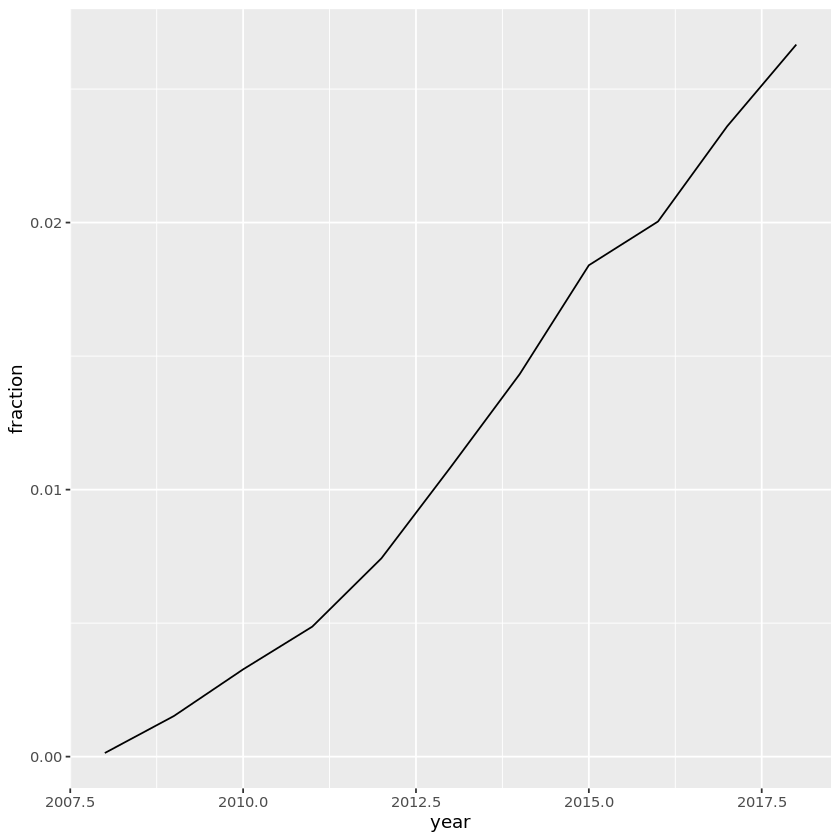

In [94]:
# Load ggplot2
library(ggplot2)

# Create a line plot of fraction over time
r_over_time %>%
    ggplot() + 
    geom_line(aes(x=year, y=fraction))

## 5. How about dplyr and ggplot2?
<p>Based on that graph, it looks like R has been growing pretty fast in the last decade. Good thing we're practicing it now!</p>
<p>Besides R, two other interesting tags are dplyr and ggplot2, which we've already used in this analysis. They both also have Stack Overflow tags!</p>
<p>Instead of just looking at R, let's look at all three tags and their change over time. Are each of those tags increasing as a fraction of overall questions? Are any of them decreasing?</p>

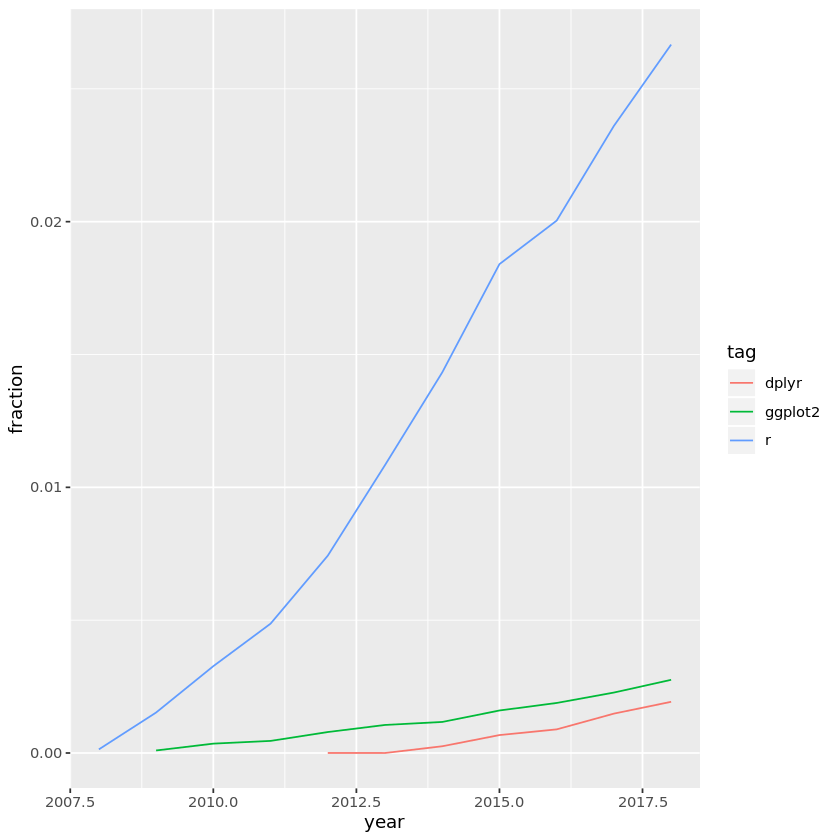

In [96]:
# A vector of selected tags
selected_tags <- c('r', 'dplyr', 'ggplot2')

# Filter for those tags
selected_tags_over_time <- by_tag_year_fraction %>%
    filter(tag %in% selected_tags)

# Plot tags over time on a line plot using color to represent tag
selected_tags_over_time %>%
    ggplot() + 
    aes(x=year, y=fraction, color=tag) + 
    geom_line()

## 6. What are the most asked-about tags?
<p>It's sure been fun to visualize and compare tags over time. The dplyr and ggplot2 tags may not have as many questions as R, but we can tell they're both growing quickly as well.</p>
<p>We might like to know which tags have the most questions <em>overall</em>, not just within a particular year. Right now, we have several rows for every tag, but we'll be combining them into one. That means we want <code>group_by()</code> and <code>summarize()</code>.</p>
<p>Let's look at tags that have the most questions in history.</p>

In [98]:
# Find total number of questions for each tag
sorted_tags <- by_tag_year %>%
    group_by(tag) %>%
    summarize(tag_total = n()) %>%
    arrange(desc(tag_total))

# Print the new table
sorted_tags

tag,tag_total
<chr>,<int>
.htaccess,11
.net,11
.net-2.0,11
.net-3.5,11
.net-4.0,11
.net-assembly,11
2d,11
32-bit,11
32bit-64bit,11


## 7. How have large programming languages changed over time?
<p>We've looked at selected tags like R, ggplot2, and dplyr, and seen that they're each growing. What tags might be <em>shrinking</em>? A good place to start is to plot the tags that we just saw that were the most-asked about of all time, including JavaScript, Java and C#.</p>

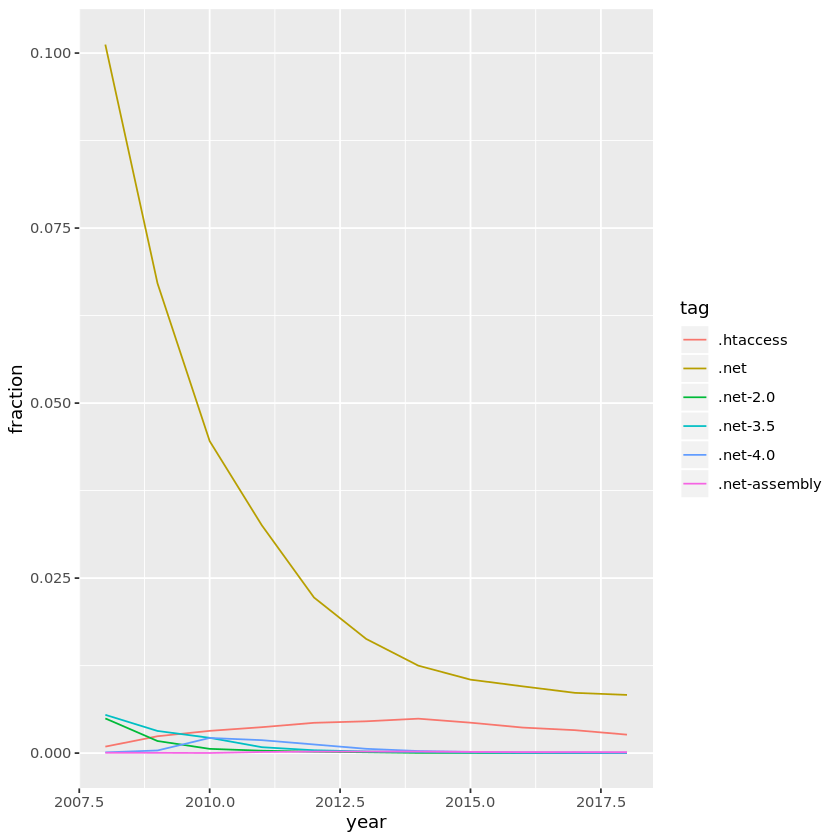

In [100]:
# Get the six largest tags
highest_tags <- head(sorted_tags$tag)

# Filter for the six largest tags
by_tag_subset <- by_tag_year_fraction %>%
    filter(tag %in% highest_tags)

# Plot tags over time on a line plot using color to represent tag
by_tag_subset %>%
    ggplot() + 
    aes(x=year, y=fraction, color=tag) +
    geom_line()

## 8. Some more tags!
<p>Wow, based on that graph we've seen a lot of changes in what programming languages are most asked about. C# gets fewer questions than it used to, and Python has grown quite impressively.</p>
<p>This Stack Overflow data is incredibly versatile. We can analyze <em>any</em> programming language, web framework, or tool where we'd like to see their change over time. Combined with the reproducibility of R and its libraries, we have ourselves a powerful method of uncovering insights about technology.</p>
<p>To demonstrate its versatility, let's check out how three big mobile operating systems (Android, iOS, and Windows Phone) have compared in popularity over time. But remember: this code can be modified simply by changing the tag names!</p>

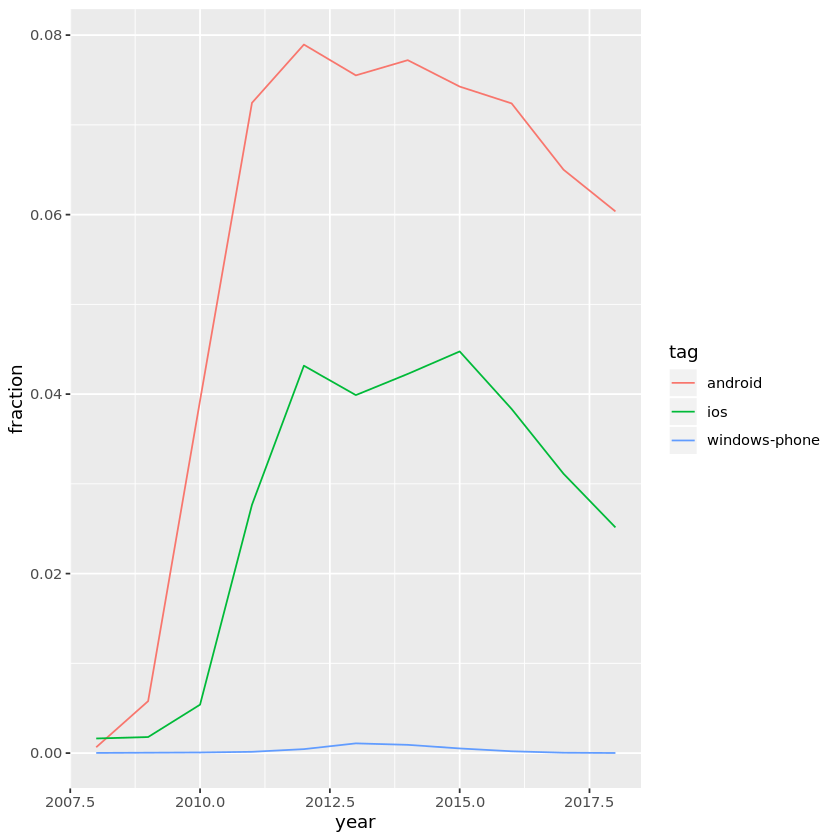

In [107]:
# Get tags of interest
my_tags <- c('android', 'ios', 'windows-phone')

# Filter for those tags
by_tag_subset <- by_tag_year_fraction %>%
    filter(tag %in% my_tags)

# Plot tags over time on a line plot using color to represent tag
by_tag_subset %>%
    ggplot() + 
    aes(x=year, y=fraction, color=tag) +
    geom_line()